# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (morfemy). W przeciwieństwie do podejść lingwistycznych, wymagających reguł tworzenia morfemów, BPE wyznacza je automatycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków które występują obok siebie.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20) razy
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10) razy
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technike BPE na tych słowach.

Zaimplementuj algorytm BPE wykonujący `number_of_iterations` iteracji (łączeń symboli).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [44]:
import pandas as pd
import numpy as np
from collections import Counter
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
def preform_bpe(brown_df, number_of_iterations):
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """
    
    # YOUR CODE HERE
    rows = brown_df.dropna().iterrows()
    results = []
    
    #################
    # Split symbols
    #################
    for key, value in rows:
        symbols = [*value['word']]
        symbols += ['END']
        # print(symbols)
        results += [[symbols, value['count']]]
    
    #################
    # Find most common pairs
    #################

    for _ in range(number_of_iterations):
        most_common_pair = None
        counter = Counter()
        
        for symbols, count in results:
            for i, _ in enumerate(symbols[:-2]): # skip END
                pair = (symbols[i], symbols[i+1])
                # print(pair)
                counter.update({pair: count})
                
        most_common_pair = counter.most_common(1)
        
        if not most_common_pair:
            break
        else:
            most_common_pair = most_common_pair[0][0]
            
        print(most_common_pair)
        
        ##########################
        # Replace and save tokens
        ##########################
        for i, (tokens, count) in enumerate(results):
            raw_str = ' '.join(tokens)
            if most_common_pair[0] + ' ' + most_common_pair[1] in raw_str:
                tokens = raw_str.replace(most_common_pair[0] + ' ' + most_common_pair[1], most_common_pair[0] + most_common_pair[1]).split(' ')
                results[i] = (tokens, count)
    
    return [' '.join(tokens) for tokens, _ in results]
        
# data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
# df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
# preform_bpe(df, 1)

Test implementacji:

In [45]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

('m', 'a')


Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [46]:
preform_bpe(brown_df, 50)

('i', 'n')
('t', 'h')
('a', 'n')
('e', 'r')
('o', 'n')
('o', 'u')
('r', 'e')
('.', '.')
('a', 't')
('t', 'o')
('in', 'g')
('i', 't')
('th', 'e')
('s', 't')
('<', '@')
('<@', 'M')
('<@M', 'E')
('<@ME', 'N')
('<@MEN', 'T')
('<@MENT', 'I')
('<@MENTI', 'O')
('<@MENTIO', 'N')
('<@MENTION', '>')
('m', 'e')
('o', 'r')
('l', 'l')
('i', 's')
('e', 'n')
('a', 'r')
('l', 'e')
('y', 'ou')
('o', 'w')
('h', 'a')
('c', 'o')
('a', 'y')
('s', 'e')
('<', 'U')
('<U', 'R')
('<UR', 'L')
('<URL', '-')
('v', 'e')
('b', 'e')
('an', 'd')
('l', 'o')
('c', 'h')
('e', 's')
('e', 'd')
('a', 's')
('o', 'f')
('g', 'o')


['\\ i END',
 '/ i / END',
 'to d ay - i END',
 'n ow i END',
 '# you e ver END',
 'i f in a ll y END',
 '「 i END',
 '- i - END',
 'in e v a END',
 '» i END',
 'w hat t ay a END',
 'i i i i i i i i i i END',
 '\ue6d1 END',
 'i k in d a END',
 'lo l - i END',
 'i a c t u a ll y END',
 'w a d d y a END',
 '# as lon g as you END',
 'd o you END',
 '\u200e \u200b i END',
 'i ̇ END',
 'ï END',
 '# lo l at g i r l s w h o END',
 '# r t i f you END',
 'i j st END',
 '« i END',
 '• i END',
 'w h o d a END',
 'w ha d y a END',
 ') i END',
 '+ i END',
 '# you r f a c e m a k es me END',
 'i i i i i i i i END',
 '` i END',
 'i i i i i i i END',
 'i a l re a d y END',
 '_ i END',
 '# you m a k e me END',
 '* i END',
 '| i END',
 '# u r b o y f r i en d e ver END',
 'w h en i END',
 'ι END',
 "d on ' t cha END",
 "w h o ' d a END",
 'd you END',
 'w ha d d ay a END',
 'i on l y END',
 'i j u s s END',
 'i a l w ay s END',
 'i i i i i END',
 'd on cha END',
 '( i END',
 "d ' y a END",
 'ı END',
 '# 

- Jakie angielskie słowo jako pierwsze dostało swój własny token?

in

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji (problem OOV, odnieś się do  k-gramów i n-gramów)?

https://towardsdatascience.com/byte-pair-encoding-the-dark-horse-of-modern-nlp-eb36c7df4f10

W przypadku BPE mamy większe szanse na znalezienie znaczenia słowa OOV poprzez dopasowanie części wyrazu (np. w języku niemieckim: jeśli znamy znaczenie 'fahre' to 'gefahren' będzie miało zapewne podobne znaczenie). K-gramy (czyli podciągi k-literowe) są mniejszym zbiorem od n-gramów.

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [47]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [48]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz przykłady uczące na cechy rośnie do bardzo dużych rozmiarów nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [49]:
# YOUR CODE HERE
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

n_features=30

y_test = [tweet.clazz for tweet in training_set.tweets[ :int(len(training_set.tweets) * 0.3)] ]
train_tokens = [tweet.tokens for tweet in training_set.tweets[ int(len(training_set.tweets) * 0.3):] ]
y_train = [tweet.clazz for tweet in training_set.tweets[ int(len(training_set.tweets) * 0.3):] ]

test_tokens = []
train_tokens = []
test_classes = []
train_classes = []


def split_training_set(training_set):
    size = len(training_set.tweets)
    split_point = int(size * 0.3)
    
    # Testing set
    for row in training_set.tweets[ : split_point ]:
        test_tokens.append(row.tokens)
        test_classes.append(row.clazz)
    
    # Training set
    for row in training_set.tweets[ split_point : ]:
        train_tokens.append(row.tokens)
        train_classes.append(row.clazz)
        
        
def hash_features(n_features, train_tokens, test_tokens):
    feature_hasher = FeatureHasher(n_features=n_features, input_type="string")
    return feature_hasher.transform(train_tokens), feature_hasher.transform(test_tokens)


def train(n_features, train_tokens, train_classes, test_tokens, test_classes):    
    train_hashed, test_hashed = hash_features(n_features, train_tokens, test_tokens)
    classifier = SVC(kernel="linear")
    classifier.fit(train_hashed, train_classes)
    predictions = classifier.predict(test_hashed)
    accuracy = accuracy_score(test_classes, predictions)
    return classifier, accuracy

split_training_set(training_set)
classifier, accuracy = train(n_features, train_tokens, train_classes, test_tokens, test_classes)

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

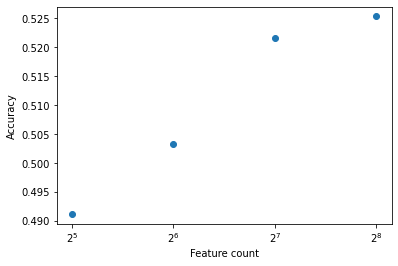

In [50]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

n_features = 2**np.arange(5, 9)
accuracies = []
for n in n_features:
    _, accuracy = train(n, train_tokens, train_classes, test_tokens, test_classes)
    accuracies.append(accuracy)

plt.xscale('log', basex=2)
plt.xlabel('Feature count')
plt.ylabel('Accuracy')
plt.scatter(dims, accuracies)
plt.show()

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Im mniejsza ilość cech tym gorsze accuracy - w prezentowanym zakresie zmiana ~6%.

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [51]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

# Prepare dict
brown_kv = {}
for key, value in brown_df.dropna().iterrows():
    new_pair = {value['word'] : value['cluster']}
    brown_kv.update(new_pair)


def train_with_clusters(train_tokens, train_classes, test_tokens, test_classes):    
    vectorizer = CountVectorizer(preprocessor=None, lowercase=False)
    train_clusters, test_clusters = vectorize_tokens(train_tokens, tokens_test)
    classifier = SVC(kernel="linear")
    classifier.fit(train_clusters, train_classes)
    predictions = classifier.predict(test_clusters)
    accuracy = accuracy_score(test_classes, predictions)
    
    return classifier, accuracy

def to_clusters(data):        
    all_clusters = []
    for tokens in data:
        tweet_clusters = []
        for token in tokens:
            try: 
                key = str(brown_kv[token])
                tweet_clusters.append(key)
            except KeyError:
                continue
            
        all_clusters.append(" ".join(tweet_clusters))
    return all_clusters

def vectorize_tokens(train_tokens, test_tokens):    
    vectorizer = CountVectorizer(preprocessor=None, lowercase=False)
    return vectorizer.fit_transform(to_clusters(train_tokens)), vectorizer.transform(to_clusters(test_tokens))


_, accuracy = train_with_clusters(train_tokens, train_classes, test_tokens, test_classes)
accuracy

0.5100794135613927

- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

Grupowanie:
- lepsza możliwość analizy słów spoza słownika
- słowa wewnątrz grupy mają podobne znaczenie
- trwa dłużej niż hashowanie

Hashowanie:
- szybsze niż grupowanie
- brak konieczności przechowywania informacji o dopasowaniu słowa do grupy znaczeń

W powyższych przykładach, accuracy było lepsze dla grupowania